# Dataset Merging

In [1]:
import pandas as pd
import string
import re
import matplotlib.pyplot as plt
import numpy as np

## CMU Cleaning

In [2]:
path0 = "data/cmu_dataset/"
data = pd.read_table(path0+"movie.metadata.tsv", header=None)
data.head(10)

,0,1,2,3,4,5,6,7,8
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."
6,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0hzlz"": ""South Africa""}","{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant..."
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ..."
8,9997961,/m/06_y2j7,Contigo y aquí,1974,NaN,NaN,"{""/m/06nm1"": ""Spanish Language""}","{""/m/0jgd"": ""Argentina""}","{""/m/04t36"": ""Musical"", ""/m/07s9rl0"": ""Drama"",..."
9,2345652,/m/075f66,City of the Dead,1960,NaN,76.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/03npn"": ""Horror"", ""/m/0fdjb"": ""Supernatur..."


In [3]:
def column_cleaner(df, columns):
    for col in columns:
        new_column = []
        for entry in df[col].values:
            l = []
            spl = re.split(', |: ', entry)
            for i in range(len(spl)):
                if i%2==1:
                    l.append(spl[i].translate(str.maketrans('', '', string.punctuation)))
            new_column.append(l)
        df[col] = new_column
    return df

In [4]:
data.drop(columns = 1, inplace=True)
data = column_cleaner(data, [6,7,8])
data.columns = ["Movie_ID", "Title", "Release_Date","Revenue","Length","Languages","Countries","Genres"]
data = data.dropna(subset=['Release_Date'])
print(data.shape)
data.head()

(74839, 8)


,Movie_ID,Title,Release_Date,Revenue,Length,Languages,Countries,Genres
0,975900,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]"
3,9363483,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri..."
4,261236,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama]


In [5]:
data["Year"] = [int(str(s)[:4]) for s in data["Release_Date"]]
data.head()

,Movie_ID,Title,Release_Date,Revenue,Length,Languages,Countries,Genres,Year
0,975900,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",2001
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",2000
2,28463795,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]",1988
3,9363483,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",1987
4,261236,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama],1983


In [6]:
data[data["Year"]==1010]        #Probably Typo in Release Date, Drop

,Movie_ID,Title,Release_Date,Revenue,Length,Languages,Countries,Genres,Year
62836,29666067,Hunting Season,1010-12-02,12160978.0,140.0,"[Turkish Language, English Language]",[Turkey],"[Crime Fiction, Mystery, Drama, Thriller]",1010


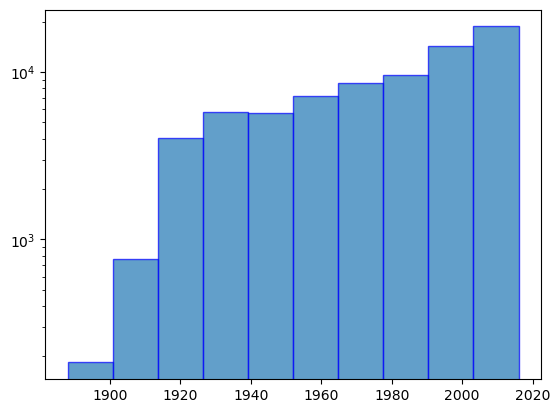

In [7]:
data = data[data["Year"]!=1010]

plt.hist(data["Year"], log=True,edgecolor="b", alpha=.7)
plt.show()

## IMDb Cleaning

In [8]:
path1 = "data/imdb_dataset/"
imdb_a = pd.read_table(path1+"title.basics.tsv")
imdb_a.head(10)

C:\Users\miche\AppData\Local\Temp\ipykernel_22360\3393495122.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  imdb_a = pd.read_table(path1+"title.basics.tsv")


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short"
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short"


In [9]:
imdb_a.drop(columns=["titleType", "isAdult", "endYear", "runtimeMinutes"], inplace=True)
imdb_a.head()

,tconst,primaryTitle,originalTitle,startYear,genres
0,tt0000001,Carmencita,Carmencita,1894,"Documentary,Short"
1,tt0000002,Le clown et ses chiens,Le clown et ses chiens,1892,"Animation,Short"
2,tt0000003,Poor Pierrot,Pauvre Pierrot,1892,"Animation,Comedy,Romance"
3,tt0000004,Un bon bock,Un bon bock,1892,"Animation,Short"
4,tt0000005,Blacksmith Scene,Blacksmith Scene,1893,"Comedy,Short"


In [10]:
imdb_b = pd.read_table(path1+"/title.ratings.tsv")
imdb_b.head(10)

,tconst,averageRating,numVotes
0,tt0000001,5.7,2097
1,tt0000002,5.6,282
2,tt0000003,6.5,2117
3,tt0000004,5.4,182
4,tt0000005,6.2,2847
5,tt0000006,5.0,198
6,tt0000007,5.4,890
7,tt0000008,5.4,2246
8,tt0000009,5.4,215
9,tt0000010,6.8,7748


In [11]:
imdb = pd.merge(imdb_a, imdb_b, on='tconst', how='inner')
imdb.head()

,tconst,primaryTitle,originalTitle,startYear,genres,averageRating,numVotes
0,tt0000001,Carmencita,Carmencita,1894,"Documentary,Short",5.7,2097
1,tt0000002,Le clown et ses chiens,Le clown et ses chiens,1892,"Animation,Short",5.6,282
2,tt0000003,Poor Pierrot,Pauvre Pierrot,1892,"Animation,Comedy,Romance",6.5,2117
3,tt0000004,Un bon bock,Un bon bock,1892,"Animation,Short",5.4,182
4,tt0000005,Blacksmith Scene,Blacksmith Scene,1893,"Comedy,Short",6.2,2847


In [12]:
imdb.replace("\\N", np.nan, inplace=True)
imdb.dropna(inplace=True)
imdb["genres"] = [str.split(g) for g in imdb["genres"]]
imdb["Year"] = [int(y) for y in imdb["startYear"]]
imdb.drop(columns = "startYear", inplace=True)
imdb.head()

,tconst,primaryTitle,originalTitle,genres,averageRating,numVotes,Year
0,tt0000001,Carmencita,Carmencita,"[Documentary,Short]",5.7,2097,1894
1,tt0000002,Le clown et ses chiens,Le clown et ses chiens,"[Animation,Short]",5.6,282,1892
2,tt0000003,Poor Pierrot,Pauvre Pierrot,"[Animation,Comedy,Romance]",6.5,2117,1892
3,tt0000004,Un bon bock,Un bon bock,"[Animation,Short]",5.4,182,1892
4,tt0000005,Blacksmith Scene,Blacksmith Scene,"[Comedy,Short]",6.2,2847,1893


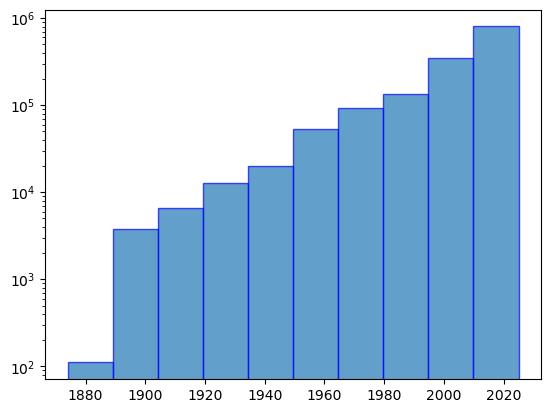

In [13]:
plt.hist(imdb["Year"], log=True,edgecolor="b", alpha=.7)
plt.show()

In [14]:
imdb.columns = ["IMDb_Index", "Title", "Original_Title", "Genres_IMDb", "Rating", "Votes", "Year"]
imdb.head()

,IMDb_Index,Title,Original_Title,Genres_IMDb,Rating,Votes,Year
0,tt0000001,Carmencita,Carmencita,"[Documentary,Short]",5.7,2097,1894
1,tt0000002,Le clown et ses chiens,Le clown et ses chiens,"[Animation,Short]",5.6,282,1892
2,tt0000003,Poor Pierrot,Pauvre Pierrot,"[Animation,Comedy,Romance]",6.5,2117,1892
3,tt0000004,Un bon bock,Un bon bock,"[Animation,Short]",5.4,182,1892
4,tt0000005,Blacksmith Scene,Blacksmith Scene,"[Comedy,Short]",6.2,2847,1893


## Dataset Merging

In [15]:
titles_cmu = set([str(a).lower() for a in data["Title"]])
titles_imdb = set([str(a).lower() for a in imdb["Title"]])

common = titles_cmu.intersection(titles_imdb)
print(len(common))

52834


In [16]:
data = data.rename(columns={'Year': 'Year_data'})
imdb = imdb.rename(columns={'Year': 'Year_imdb'})

In [17]:
merged_data = pd.merge(data, imdb, on='Title', how='inner')
merged_data.head()

,Movie_ID,Title,Release_Date,Revenue,Length,Languages,Countries,Genres,Year_data,IMDb_Index,Original_Title,Genres_IMDb,Rating,Votes,Year_imdb
0,975900,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",2001,tt0228333,Ghosts of Mars,"[Action,Horror,Sci-Fi]",4.9,58872,2001
1,975900,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",2001,tt0594845,Ghosts of Mars,"[Documentary,Short]",7.6,20,2001
2,28463795,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]",1988,tt0094806,Brun bitter,"[Crime,Drama]",5.6,42,1988
3,261236,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama],1983,tt0083949,Die flambierte Frau,[Drama],5.9,648,1983
4,13696889,The Gangsters,1913-05-29,NaN,35.0,"[Silent film, English Language]",[United States of America],"[Short Film, Silent film, Indie, Blackandwhite...",1913,tt0002894,The Gangsters,"[Comedy,Short]",7.2,19,1913


In [18]:
print(merged_data.shape)
len(merged_data[merged_data["Year_data"]!=merged_data["Year_imdb"]])

(263884, 15)


212865

In [19]:
merged_data = merged_data[merged_data["Year_data"]==merged_data["Year_imdb"]]
merged_data = merged_data[~merged_data['Genres_IMDb'].astype(str).str.contains("Short")]
print(merged_data.shape)
merged_data.head()

(47395, 15)


,Movie_ID,Title,Release_Date,Revenue,Length,Languages,Countries,Genres,Year_data,IMDb_Index,Original_Title,Genres_IMDb,Rating,Votes,Year_imdb
0,975900,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",2001,tt0228333,Ghosts of Mars,"[Action,Horror,Sci-Fi]",4.9,58872,2001
2,28463795,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]",1988,tt0094806,Brun bitter,"[Crime,Drama]",5.6,42,1988
3,261236,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama],1983,tt0083949,Die flambierte Frau,[Drama],5.9,648,1983
23,10408933,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,[English Language],[United States of America],"[Musical, Comedy, Blackandwhite]",1938,tt0029852,Alexander's Ragtime Band,"[Drama,Music,Musical]",6.8,2357,1938
32,175026,Sarah and Son,1930,NaN,86.0,[English Language],[United States of America],"[Drama, Blackandwhite]",1930,tt0021335,Sarah and Son,"[Drama,Romance]",5.4,355,1930


In [20]:
merged_data = merged_data.rename(columns={'Year_data': 'Year'})
merged_data.drop(columns = "Year_imdb", inplace=True)

In [21]:
merged_data = merged_data[["Movie_ID", "IMDb_Index", "Title", "Original_Title", "Release_Date", "Year", "Genres", "Genres_IMDb", "Rating", "Votes", "Revenue", "Length", "Languages", "Countries"]]
merged_data.head()

,Movie_ID,IMDb_Index,Title,Original_Title,Release_Date,Year,Genres,Genres_IMDb,Rating,Votes,Revenue,Length,Languages,Countries
0,975900,tt0228333,Ghosts of Mars,Ghosts of Mars,2001-08-24,2001,"[Thriller, Science Fiction, Horror, Adventure,...","[Action,Horror,Sci-Fi]",4.9,58872,14010832.0,98.0,[English Language],[United States of America]
2,28463795,tt0094806,Brun bitter,Brun bitter,1988,1988,"[Crime Fiction, Drama]","[Crime,Drama]",5.6,42,NaN,83.0,[Norwegian Language],[Norway]
3,261236,tt0083949,A Woman in Flames,Die flambierte Frau,1983,1983,[Drama],[Drama],5.9,648,NaN,106.0,[German Language],[Germany]
23,10408933,tt0029852,Alexander's Ragtime Band,Alexander's Ragtime Band,1938-08-16,1938,"[Musical, Comedy, Blackandwhite]","[Drama,Music,Musical]",6.8,2357,3600000.0,106.0,[English Language],[United States of America]
32,175026,tt0021335,Sarah and Son,Sarah and Son,1930,1930,"[Drama, Blackandwhite]","[Drama,Romance]",5.4,355,NaN,86.0,[English Language],[United States of America]


In [22]:
merged_data.to_csv('data/filtered_movie_data.csv', index=False)

## To Remove, how to use

In [24]:
# Import
data = pd.read_table("data/filtered_movie_data.csv", sep=",")
data.head(10)

,Movie_ID,IMDb_Index,Title,Original_Title,Release_Date,Year,Genres,Genres_IMDb,Rating,Votes,Revenue,Length,Languages,Countries
0,975900,tt0228333,Ghosts of Mars,Ghosts of Mars,2001-08-24,2001,"['Thriller', 'Science Fiction', 'Horror', 'Adv...","['Action,Horror,Sci-Fi']",4.9,58872,14010832.0,98.0,['English Language'],['United States of America']
1,28463795,tt0094806,Brun bitter,Brun bitter,1988,1988,"['Crime Fiction', 'Drama']","['Crime,Drama']",5.6,42,NaN,83.0,['Norwegian Language'],['Norway']
2,261236,tt0083949,A Woman in Flames,Die flambierte Frau,1983,1983,['Drama'],['Drama'],5.9,648,NaN,106.0,['German Language'],['Germany']
3,10408933,tt0029852,Alexander's Ragtime Band,Alexander's Ragtime Band,1938-08-16,1938,"['Musical', 'Comedy', 'Blackandwhite']","['Drama,Music,Musical']",6.8,2357,3600000.0,106.0,['English Language'],['United States of America']
4,175026,tt0021335,Sarah and Son,Sarah and Son,1930,1930,"['Drama', 'Blackandwhite']","['Drama,Romance']",5.4,355,NaN,86.0,['English Language'],['United States of America']
5,24229100,tt0072157,Lady Snowblood 2: Love Song of Vengeance,Shurayukihime: Urami renka,1974,1974,"['Crime Fiction', 'Thriller', 'Japanese Movies...","['Drama,Thriller']",6.3,4348,NaN,89.0,['Japanese Language'],['Japan']
6,171005,tt0097499,Henry V,Henry V,1989-11-08,1989,"['Costume drama', 'War film', 'Epic', 'Period ...","['Biography,Drama,History']",7.5,32088,10161099.0,137.0,['English Language'],['United Kingdom']
7,77856,tt0058331,Mary Poppins,Mary Poppins,1964-08-27,1964,"['ChildrensFamily', 'Musical', 'Fantasy', 'Com...","['Comedy,Family,Fantasy']",7.8,189202,102272727.0,139.0,['English Language'],['United States of America']
8,32456683,tt0061637,Die Fahne von Kriwoj Rog,Die Fahne von Kriwoj Rog,1967,1967,[],['Drama'],7.7,24,NaN,108.0,['German Language'],['German Democratic Republic']
9,33420460,tt0104601,Keep the Change,Keep the Change,1992,1992,['Drama'],['Drama'],5.7,102,NaN,97.0,['English Language'],['United States of America']


In [25]:
# Convert Movie Genres to Lists, can be extended to other columns
data['Genres'] = data['Genres'].fillna("[]")
data['Genres'] = data['Genres'].str.strip("[]").str.replace("'", "").str.split(", ")

data['Genres_IMDb'] = data['Genres_IMDb'].fillna("[]")
data['Genres_IMDb'] = data['Genres_IMDb'].str.strip("[]").str.replace("'", "").str.split(",")